#### datasets accessed from: 

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data
(covid_19_data) cumulative confirmed/deaths/recoveries


---




### This is an attempt to analyse, plot and understand data regarding COVID-19 and it's spreading worldwide and Europe in particular.


#### Nikos Plessas, this work is part of my Thesis


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
#sns.set_style("whitegrid")
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.graph_objs as go


In [ ]:
!pip install pycountry_convert #assing continent to country

     |████████████████████████████████| 10.1MB 5.5MB/s 
     |████████████████████████████████| 235kB 45.0MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=c67a0a1a5a67c0e126a52d4ceb3b82f3a23345c82eb1fcff2584fb3ac1282fad
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

In [ ]:
import folium
import pycountry_convert as pc


In [ ]:
path = "https://raw.githubusercontent.com/niplessa/Datasets/main/covid_19_data.csv"

#general dataset
df = pd.read_csv(path)

In [ ]:
df.loc[df['Country/Region'] == "UK", "Country/Region"] = "United Kingdom"
df.loc[df['Country/Region'] == "US", "Country/Region"] = "USA"


In [ ]:
#convert floats to int
df['Confirmed']=df['Confirmed'].astype('int64')
df['Recovered']=df['Recovered'].astype('int64')
df['Deaths']=df['Deaths'].astype('int64')


In [ ]:
df['ActiveCases'] = df['Confirmed'] - (df['Deaths'] + df['Recovered'])
#df['MortalityRate'] = (df['Deaths']*100/df['Confirmed'])

In [ ]:
'''#null values in Mortality Rate are caused from division by zer0. Change them to 0.

from numpy import inf
df['MortalityRate'][(df['MortalityRate']== -inf) | (df['MortalityRate']== inf)] = 0
df['MortalityRate'][(df['Deaths'] == 0) & (df['Confirmed'] == 0)] = 0'''

#Drop Province/State
df.drop('Province/State', axis=1, inplace=True)
df.drop('SNo', axis=1, inplace=True)

### Add continent variable to dataframe

In [ ]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [ ]:
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


In [ ]:
#get all countries
countries = np.asarray(df["Country/Region"])

df.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries[:]])

In [ ]:
df.tail()

,ObservationDate,Country/Region,Continent,Last Update,Confirmed,Deaths,Recovered,ActiveCases
116800,09/23/2020,Ukraine,Europe,2020-09-24 04:23:38,3149,49,1158,1942
116801,09/23/2020,Netherlands,Europe,2020-09-24 04:23:38,1270,72,0,1198
116802,09/23/2020,Mainland China,Others,2020-09-24 04:23:38,1282,1,1272,9
116803,09/23/2020,Ukraine,Europe,2020-09-24 04:23:38,5191,92,2853,2246
116804,09/23/2020,Netherlands,Europe,2020-09-24 04:23:38,29513,1372,0,28141


In [ ]:
# Checking Missing Values
df.isnull().sum()

ObservationDate    0
Country/Region     0
Continent          0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
ActiveCases        0
dtype: int64

In [ ]:
df.isnull().sum()
#ok no more null values

ObservationDate    0
Country/Region     0
Continent          0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
ActiveCases        0
dtype: int64

In [ ]:
# Change date column to datetime data types
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['ObservationDate'] = df['ObservationDate'].apply(lambda x: x.date())
df.tail()

,ObservationDate,Country/Region,Continent,Last Update,Confirmed,Deaths,Recovered,ActiveCases
116800,2020-09-23,Ukraine,Europe,2020-09-24 04:23:38,3149,49,1158,1942
116801,2020-09-23,Netherlands,Europe,2020-09-24 04:23:38,1270,72,0,1198
116802,2020-09-23,Mainland China,Others,2020-09-24 04:23:38,1282,1,1272,9
116803,2020-09-23,Ukraine,Europe,2020-09-24 04:23:38,5191,92,2853,2246
116804,2020-09-23,Netherlands,Europe,2020-09-24 04:23:38,29513,1372,0,28141


In [ ]:
# Creating dataframes for global cases
conf = df.groupby(['ObservationDate']).sum()['Confirmed'].reset_index()
deat = df.groupby(['ObservationDate']).sum()['Deaths'].reset_index()
recov = df.groupby(['ObservationDate']).sum()['Recovered'].reset_index()
act = df.groupby(['ObservationDate']).sum()['ActiveCases'].reset_index()
global_cases = conf.merge(deat, on=['ObservationDate']).merge(recov, on=['ObservationDate']).merge(act, on=['ObservationDate']).set_index('ObservationDate')
global_cases['MortalityRate'] = global_cases['Deaths']*100/global_cases['Confirmed']
global_cases['RecoveryRate'] = global_cases['Recovered']*100/global_cases['Confirmed']


In [ ]:
global_cases.tail()
#agrees with worldometer

,Confirmed,Deaths,Recovered,ActiveCases,MortalityRate,RecoveryRate
ObservationDate,,,,,,
2020-09-19,30688150,955866,20922189,8810095,3.114772,68.176769
2020-09-20,30935011,959565,21159459,8815987,3.101874,68.399714
2020-09-21,31245797,963693,21394593,8887511,3.084232,68.471907
2020-09-22,31517087,969578,21624434,8923075,3.076357,68.611779
2020-09-23,31779835,975104,21890442,8914289,3.068310,68.881547


Text(0.5, 0, 'Month')

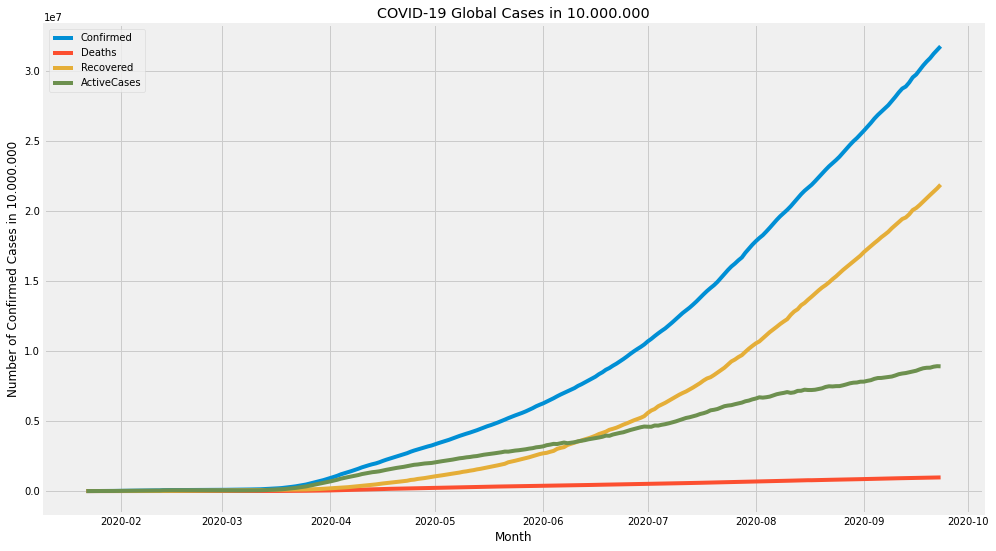

In [ ]:
plt.figure(figsize=[15,9])
sns.lineplot(x = global_cases.index, y = global_cases.Confirmed, legend='full')
sns.lineplot(x = global_cases.index, y = global_cases.Deaths, legend='full')
sns.lineplot(x = global_cases.index, y = global_cases.Recovered, legend='full')
sns.lineplot(x = global_cases.index, y = global_cases.ActiveCases, legend='full')
plt.title('COVID-19 Global Cases in 10.000.000')
plt.legend(global_cases, prop={'size': 10})
plt.ylabel('Number of Confirmed Cases in 10.000.000')
plt.xlabel('Month')


Text(0.5, 0, 'Date')

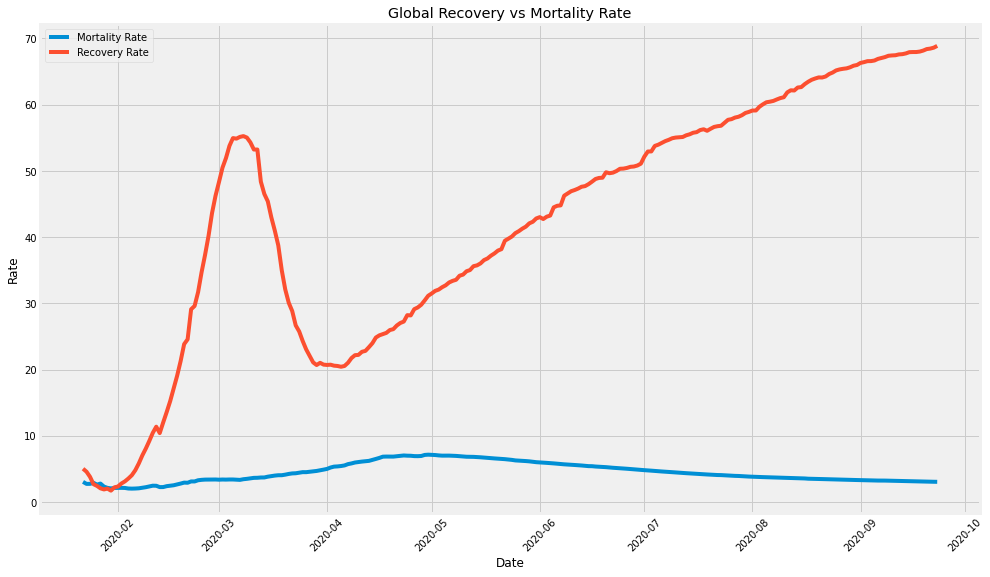

In [ ]:
plt.figure(figsize=[15,9])
sns.lineplot(x = global_cases.index, y = global_cases.MortalityRate, legend='full')
sns.lineplot(x = global_cases.index, y = global_cases.RecoveryRate, legend='full')
plt.title('Global Recovery vs Mortality Rate')
plt.legend(['Mortality Rate','Recovery Rate'], prop={'size': 10})
plt.xticks(rotation=45)
plt.ylabel('Rate')
plt.xlabel('Date')

In [ ]:
from datetime import date
import datetime

#Εύρεση μεγαλύτερης ημερομηνίας του Dataset
d = df['ObservationDate'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

print("\nLast update: {}-{}-{}\n".format(year,month,day))
last_date = str(day)+"-"+str(month)+"-"+str(year)
#print(last_date)

#data_latest : last date in datetime
data_latest = df[df['ObservationDate'] >= pd.Timestamp(date(year,month,day))]
cases = pd.DataFrame(data_latest.groupby('Country/Region').sum()).reset_index(drop=None)
country_stats = cases[['Country/Region','Confirmed','Deaths','Recovered','ActiveCases']]
country_stats['MortalityRate'] = country_stats['Deaths']*100/country_stats['Confirmed']
country_stats['LastUpdate'] = last_date

#assign continent to country
countries = np.asarray(country_stats["Country/Region"])
country_stats.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries[:]])

country_stats=country_stats.sort_values(by=['Confirmed'],ascending=False).reset_index(drop=True)
country_stats.style.background_gradient(cmap='Reds')



Last update: 2020-9-23



,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate
0,USA,6933548,North America,201884,2670256,4061408,2.911698,23-9-2020
1,India,5646010,Asia,90020,4587613,968377,1.594400,23-9-2020
2,Brazil,4591364,South America,138105,4046827,406432,3.007930,23-9-2020
3,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020
4,Colombia,784268,South America,24746,662277,97245,3.155299,23-9-2020
5,Peru,776546,South America,31568,636489,108489,4.065181,23-9-2020
6,Mexico,710049,North America,74949,601611,33489,10.555469,23-9-2020
7,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020
8,South Africa,665188,Africa,16206,594229,54753,2.436304,23-9-2020
9,Argentina,664799,South America,14376,525486,124937,2.162458,23-9-2020


<function matplotlib.pyplot.show>

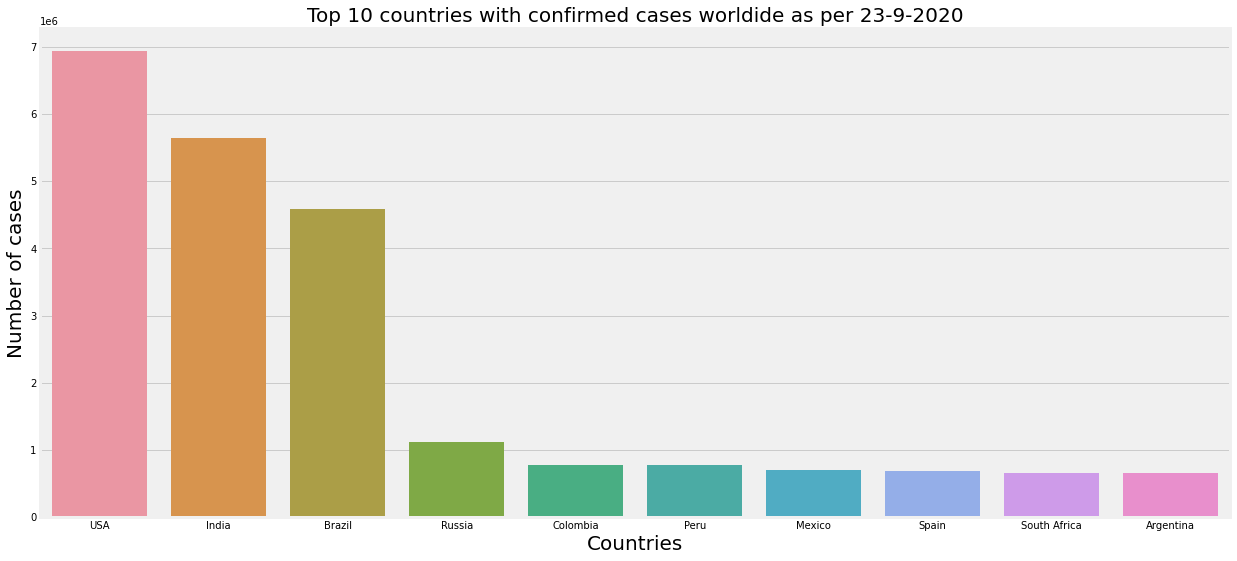

In [ ]:
plt.figure(figsize=[19,9])
sns.barplot(x="Country/Region",
            y="Confirmed",
            data=country_stats.sort_values('Confirmed', ascending=False).head(10),
           )
plt.title("Top 10 countries with confirmed cases worldide as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.figure
plt.show

Text(0.5, 0, 'Countries')

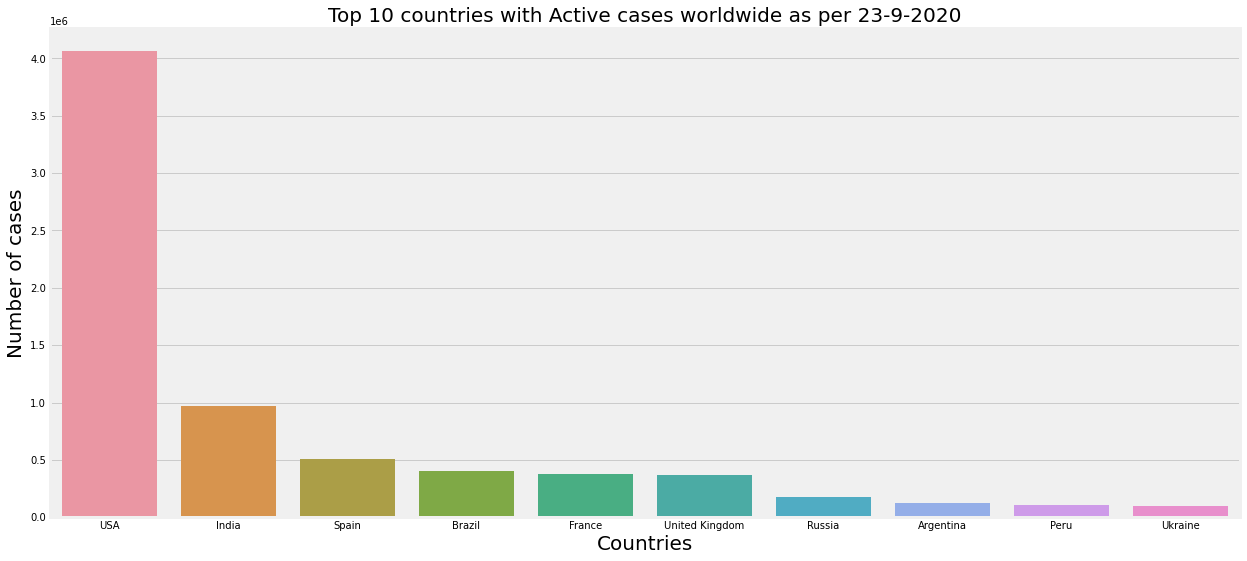

In [ ]:
plt.figure(figsize=[19,9])
sns.barplot(x="Country/Region",
            y="ActiveCases",
            data=country_stats.sort_values('ActiveCases', ascending=False).head(10),
           )
plt.title("Top 10 countries with Active cases worldwide as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)


Text(0.5, 0, 'Countries')

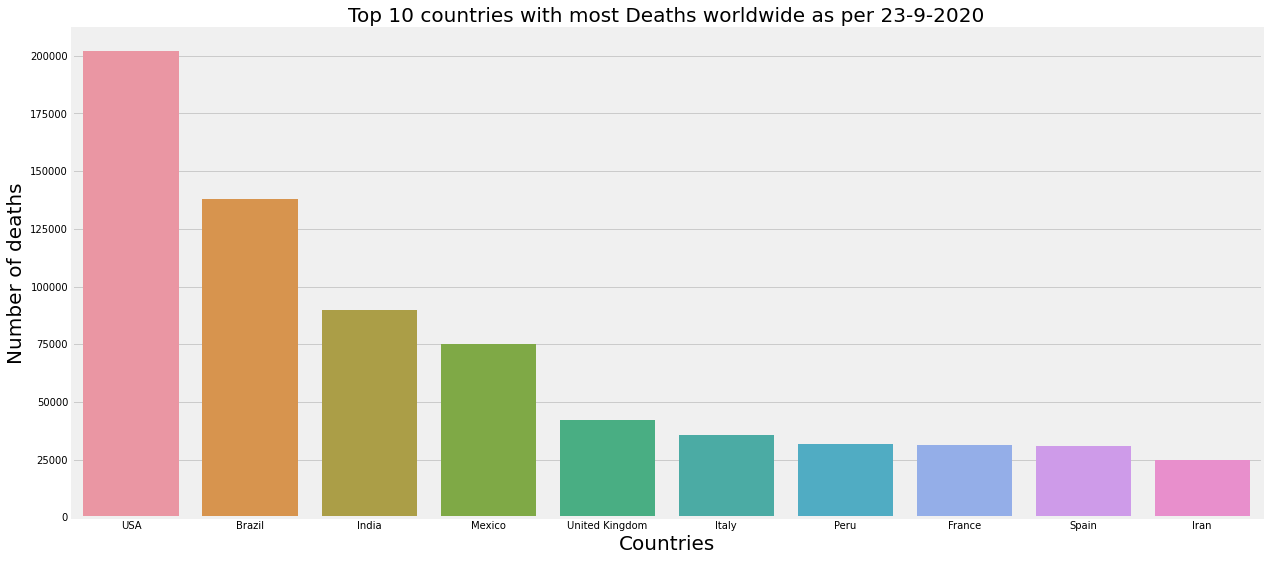

In [ ]:
plt.figure(figsize=[19,9])
sns.barplot(x="Country/Region",
            y="Deaths",
            data=country_stats.sort_values('Deaths', ascending=False).head(10),
           )
plt.title("Top 10 countries with most Deaths worldwide as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of deaths',fontsize=20)
plt.xlabel('Countries',fontsize=20)

### Put Continent Variable in dataframe and work with Europe


In [ ]:
df_Europe = country_stats[country_stats["Continent"]=='Europe']

In [ ]:
df_Europe=df_Europe.sort_values(by=['Confirmed'],ascending=False).reset_index(drop=True)


In [ ]:
df_Europe.head()

,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate
0,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020
1,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020
2,France,508456,Europe,31447,96498,380511,6.184803,23-9-2020
3,United Kingdom,412245,Europe,41951,2247,368047,10.176230,23-9-2020
4,Italy,302537,Europe,35758,220665,46114,11.819381,23-9-2020


## Plots for European Countries


<function matplotlib.pyplot.show>

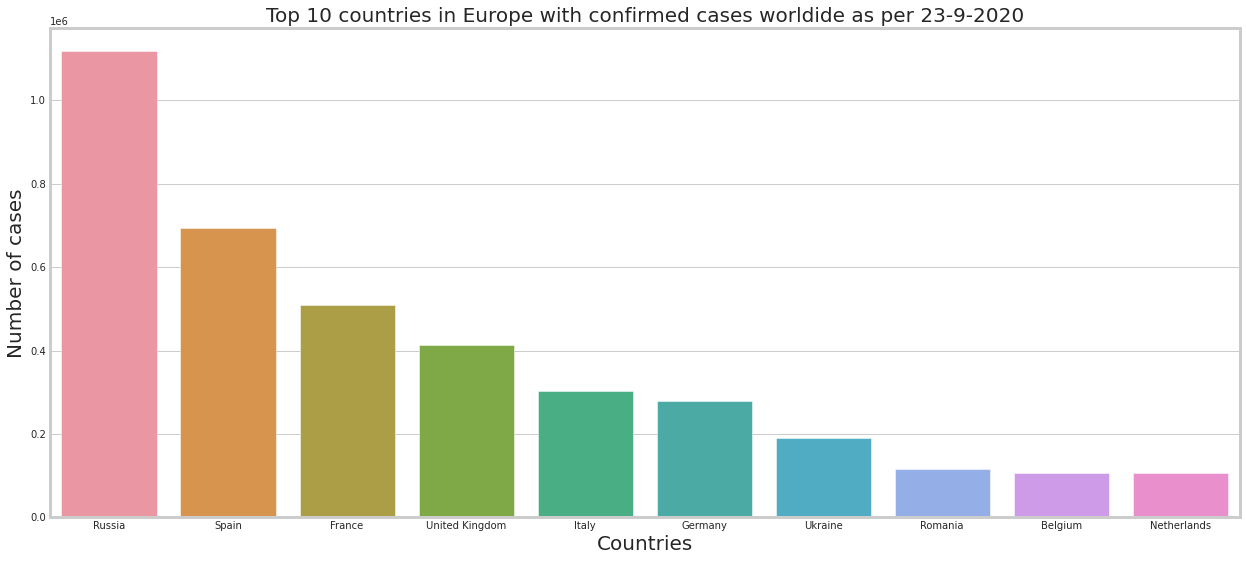

In [ ]:
plt.figure(figsize=[19,9])
sns.set_style("whitegrid")
sns.barplot(x="Country/Region",
            y="Confirmed",
            data=df_Europe.sort_values('Confirmed', ascending=False).head(10),
           )
plt.title("Top 10 countries in Europe with confirmed cases worldide as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.figure
plt.show

<function matplotlib.pyplot.show>

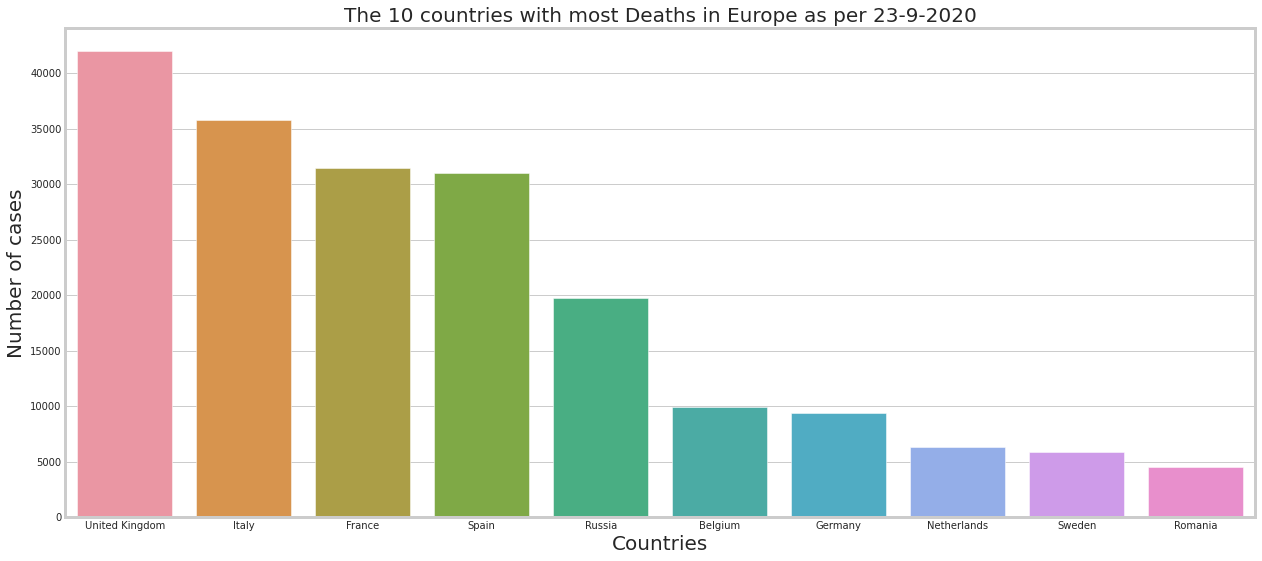

In [ ]:
plt.figure(figsize=[19,9])
sns.set_style("whitegrid")
sns.barplot(x="Country/Region",
            y="Deaths",
            data=df_Europe.sort_values('Deaths', ascending=False).head(10),
           )
plt.title("The 10 countries with most Deaths in Europe as per {}".format(last_date),fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.xlabel('Countries',fontsize=20)
plt.figure
plt.show

In [ ]:
df_Europe=df_Europe.sort_values(by=['Confirmed'],ascending=False).reset_index(drop=True)
df_Europe.style.background_gradient(cmap='Reds')


,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate
0,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020
1,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020
2,France,508456,Europe,31447,96498,380511,6.184803,23-9-2020
3,United Kingdom,412245,Europe,41951,2247,368047,10.176230,23-9-2020
4,Italy,302537,Europe,35758,220665,46114,11.819381,23-9-2020
5,Germany,279025,Europe,9423,245706,23896,3.377117,23-9-2020
6,Ukraine,189488,Europe,3784,84767,100937,1.996960,23-9-2020
7,Romania,116415,Europe,4550,93558,18307,3.908431,23-9-2020
8,Belgium,106887,Europe,9959,19079,77849,9.317316,23-9-2020
9,Netherlands,105304,Europe,6344,3143,95817,6.024463,23-9-2020


## Europe plots vs Time

In [ ]:
# Creating dataframes for Europe cases vs time
eur_cas = df[df['Continent']=='Europe']
confEur = eur_cas.groupby(['ObservationDate']).sum()['Confirmed'].reset_index()
deatEur = eur_cas.groupby(['ObservationDate']).sum()['Deaths'].reset_index()
recovEur = eur_cas.groupby(['ObservationDate']).sum()['Recovered'].reset_index()
actEur = eur_cas.groupby(['ObservationDate']).sum()['ActiveCases'].reset_index()
Europe_cases = confEur.merge(deatEur, on=['ObservationDate']).merge(recovEur, on=['ObservationDate']).merge(actEur, on=['ObservationDate']).set_index('ObservationDate')
Europe_cases['MortalityRate'] = Europe_cases['Deaths']/Europe_cases['Confirmed']
Europe_cases['RecoveryRate'] = Europe_cases['Recovered']/Europe_cases['Confirmed']


Text(0.5, 0, 'Month')

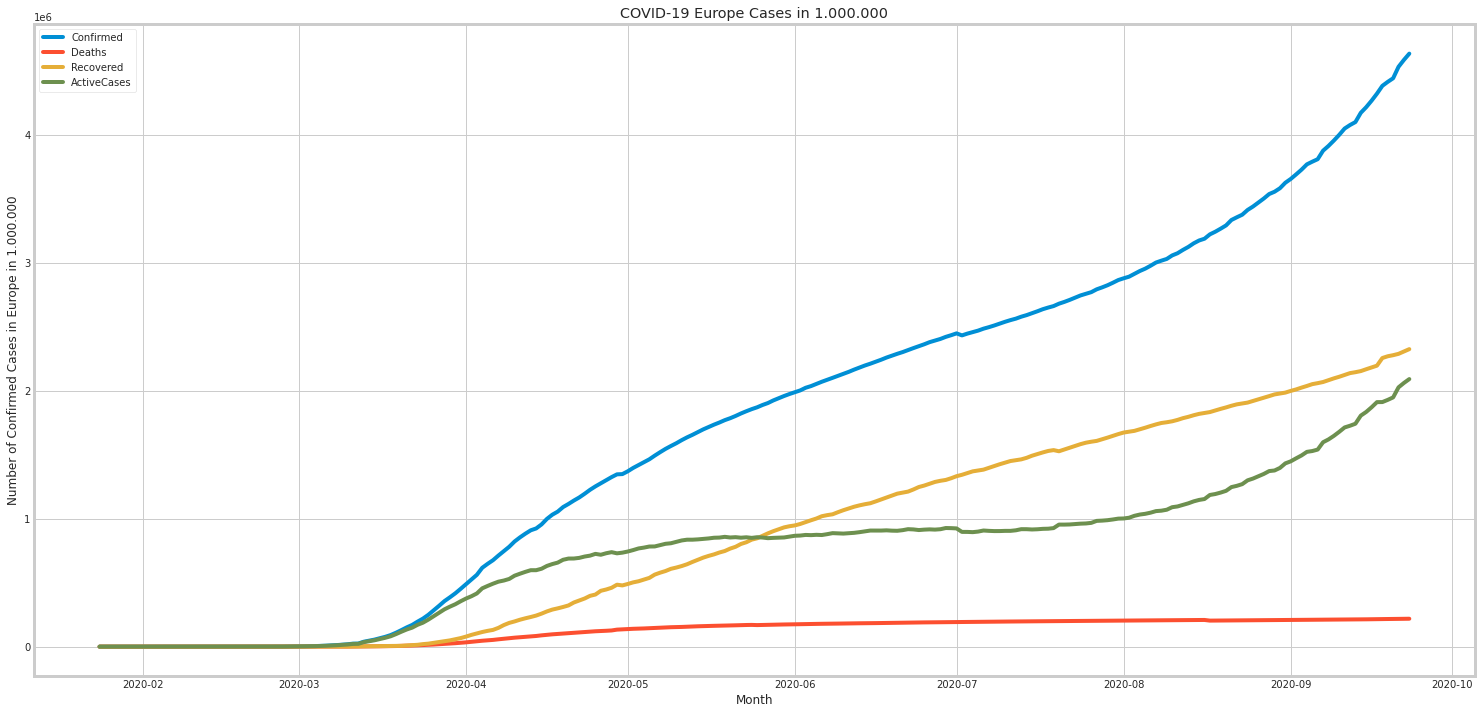

In [ ]:
#Confirmed,Deaths,Active Cases in Europe vs time
plt.figure(figsize=[23,12])
sns.lineplot(x = Europe_cases.index, y = Europe_cases.Confirmed, legend='full')
sns.lineplot(x = Europe_cases.index, y = Europe_cases.Deaths, legend='full')
sns.lineplot(x = Europe_cases.index, y = Europe_cases.Recovered, legend='full')
sns.lineplot(x = Europe_cases.index, y = Europe_cases.ActiveCases, legend='full')
plt.title('COVID-19 Europe Cases in 1.000.000')
plt.legend(Europe_cases, prop={'size': 10})
plt.ylabel('Number of Confirmed Cases in Europe in 1.000.000')
plt.xlabel('Month')


Text(0.5, 0, 'Date')

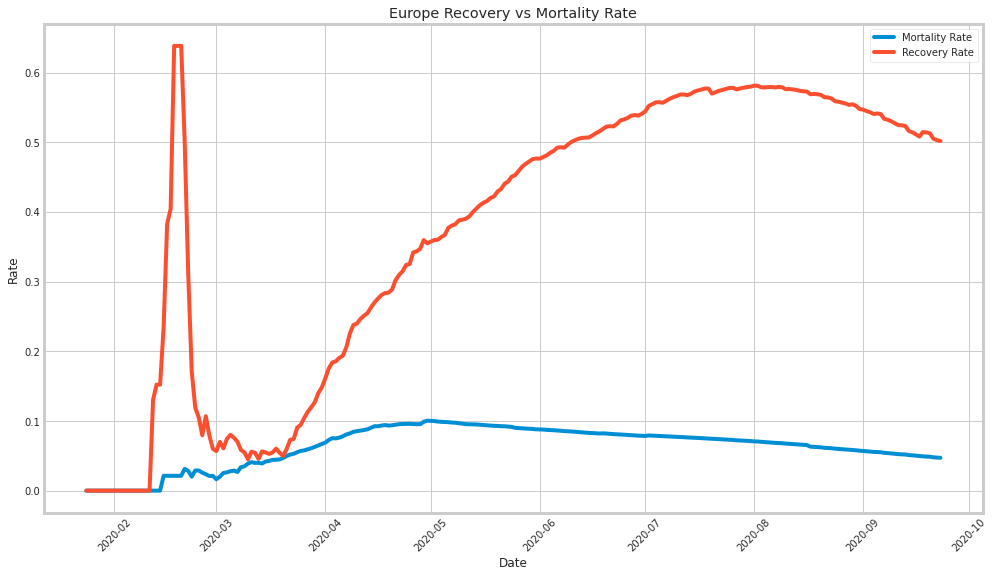

In [ ]:
#mortality and recovery rate
plt.figure(figsize=[15,9])
sns.lineplot(x = Europe_cases.index, y = Europe_cases.MortalityRate, legend='full')
sns.lineplot(x = Europe_cases.index, y = Europe_cases.RecoveryRate, legend='full')
plt.title('Europe Recovery vs Mortality Rate')
plt.legend(['Mortality Rate','Recovery Rate'], prop={'size': 10})
plt.xticks(rotation=45)
plt.ylabel('Rate')
plt.xlabel('Date')

In [ ]:
#function to create a dataframe for each country

def country_cases(c):
    c=df[df['Country/Region']==c].reset_index(drop=True)
    conf = c.groupby(['ObservationDate']).sum()['Confirmed'].reset_index()
    death = c.groupby(['ObservationDate']).sum()['Deaths'].reset_index()
    recov = c.groupby(['ObservationDate']).sum()['Recovered'].reset_index()
    act = c.groupby(['ObservationDate']).sum()['ActiveCases'].reset_index()
    #merge series in a single DataFrame
    c_cases = conf.merge(death, on=['ObservationDate']).merge(recov, on=['ObservationDate']).merge(act, on=['ObservationDate']).set_index('ObservationDate')
    c_cases['MortalityRate'] = c_cases['Deaths']*100/c_cases['Confirmed']
    return(c_cases)


In [ ]:
Italy_cases=country_cases("Italy")
UK_cases = country_cases("United Kingdom")
Spain_cases = country_cases("Spain")
Russia_cases = country_cases("Russia")
France_cases = country_cases("France")

most_affected = ["Italy","UK","Spain","Russia","France"]


Text(0.5, 0, 'Month')

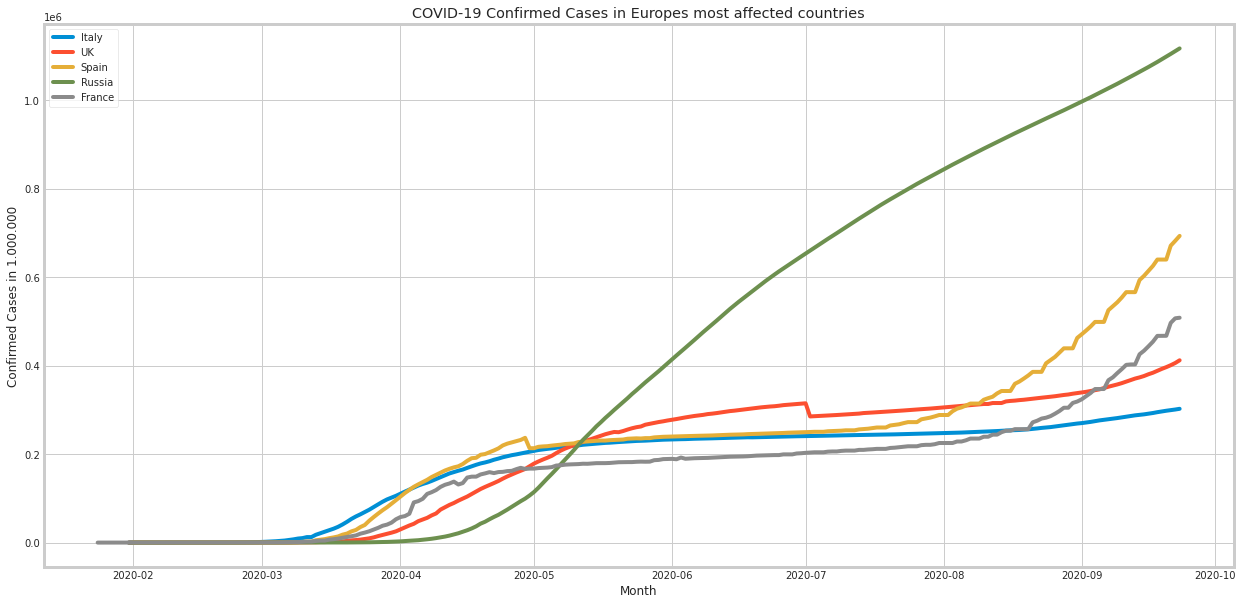

In [ ]:
#plot Confirmed
plt.figure(figsize=[19,10])
sns.lineplot(x = Italy_cases.index, y =Italy_cases.Confirmed, legend="full")
sns.lineplot(x = UK_cases.index, y =UK_cases.Confirmed, legend="full")
sns.lineplot(x = Spain_cases.index, y =Spain_cases.Confirmed, legend="full")
sns.lineplot(x = Russia_cases.index, y =Russia_cases.Confirmed, legend="full")
sns.lineplot(x = France_cases.index, y =France_cases.Confirmed, legend="full")

plt.title('COVID-19 Confirmed Cases in Europes most affected countries')
plt.legend(most_affected, prop={'size': 10})
plt.ylabel('Confirmed Cases in 1.000.000')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

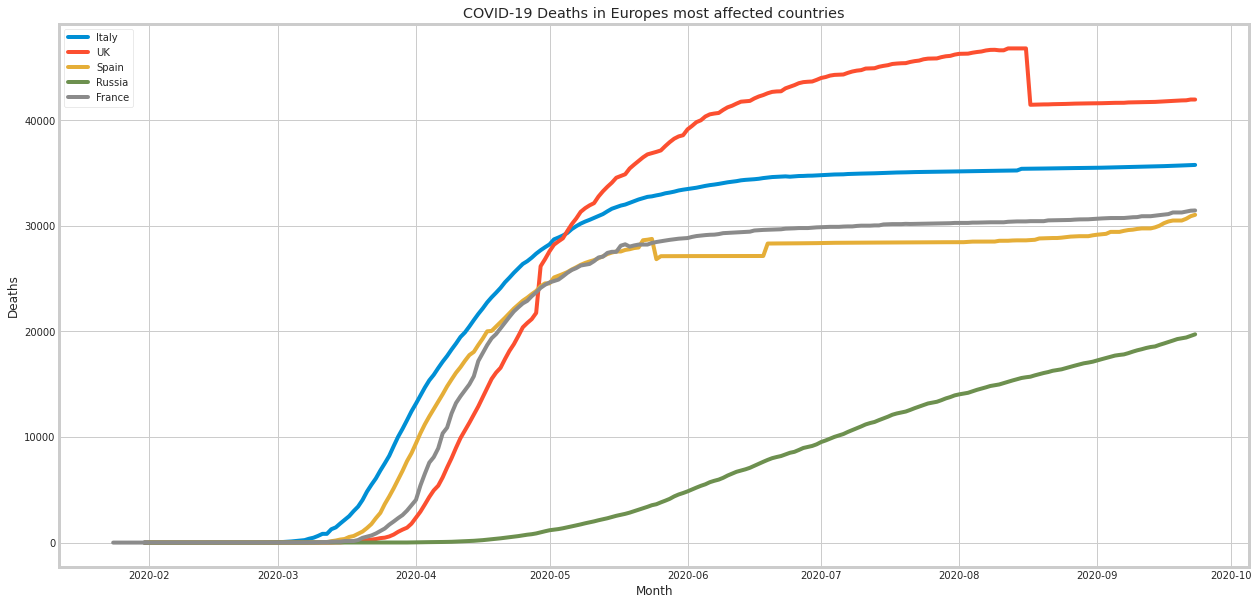

In [ ]:
#plot Deaths
plt.figure(figsize=[19,10])
sns.lineplot(x = Italy_cases.index, y =Italy_cases.Deaths, legend="full")
sns.lineplot(x = UK_cases.index, y =UK_cases.Deaths, legend="full")
sns.lineplot(x = Spain_cases.index, y =Spain_cases.Deaths, legend="full")
sns.lineplot(x = Russia_cases.index, y =Russia_cases.Deaths, legend="full")
sns.lineplot(x = France_cases.index, y =France_cases.Deaths, legend="full")

plt.title('COVID-19 Deaths in Europes most affected countries')
plt.legend(most_affected, prop={'size': 10})
plt.ylabel('Deaths')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

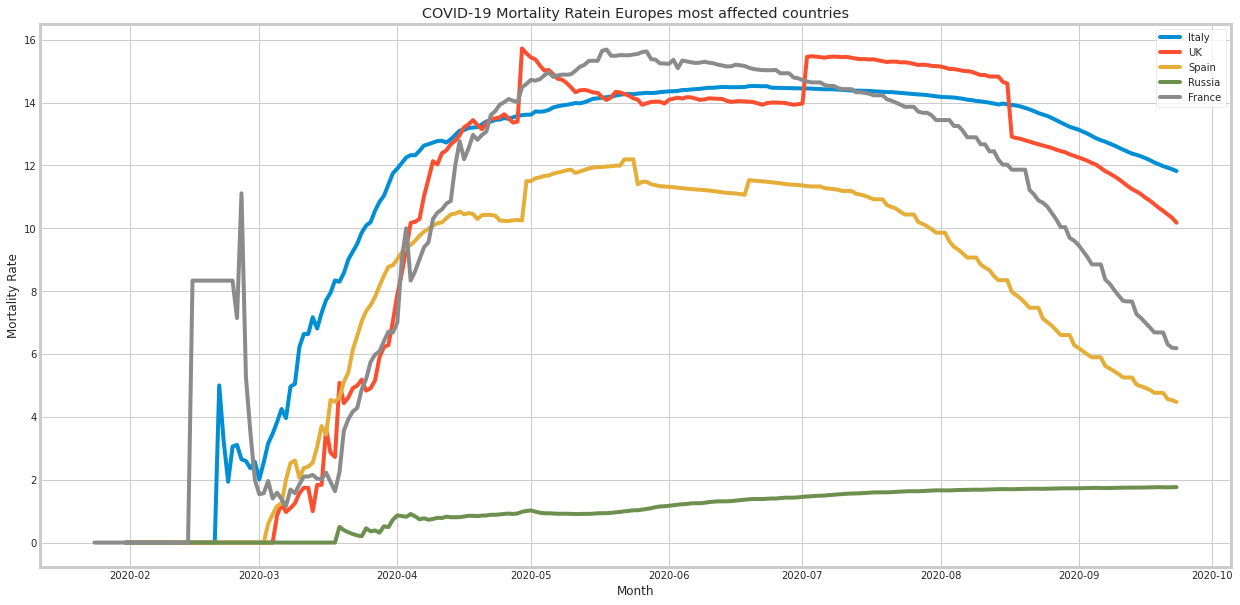

In [ ]:
#plot Mortality Rate
plt.figure(figsize=[19,10])
sns.lineplot(x = Italy_cases.index, y =Italy_cases.MortalityRate, legend="full")
sns.lineplot(x = UK_cases.index, y =UK_cases.MortalityRate, legend="full")
sns.lineplot(x = Spain_cases.index, y =Spain_cases.MortalityRate, legend="full")
sns.lineplot(x = Russia_cases.index, y =Russia_cases.MortalityRate, legend="full")
sns.lineplot(x = France_cases.index, y =France_cases.MortalityRate, legend="full")

plt.title('COVID-19 Mortality Ratein Europes most affected countries')
plt.legend(most_affected, prop={'size': 10})
plt.ylabel('Mortality Rate')
plt.xlabel('Month')

In [ ]:
#let's study Greece
Greece_cases=country_cases("Greece")

Text(0.5, 0, 'Month')

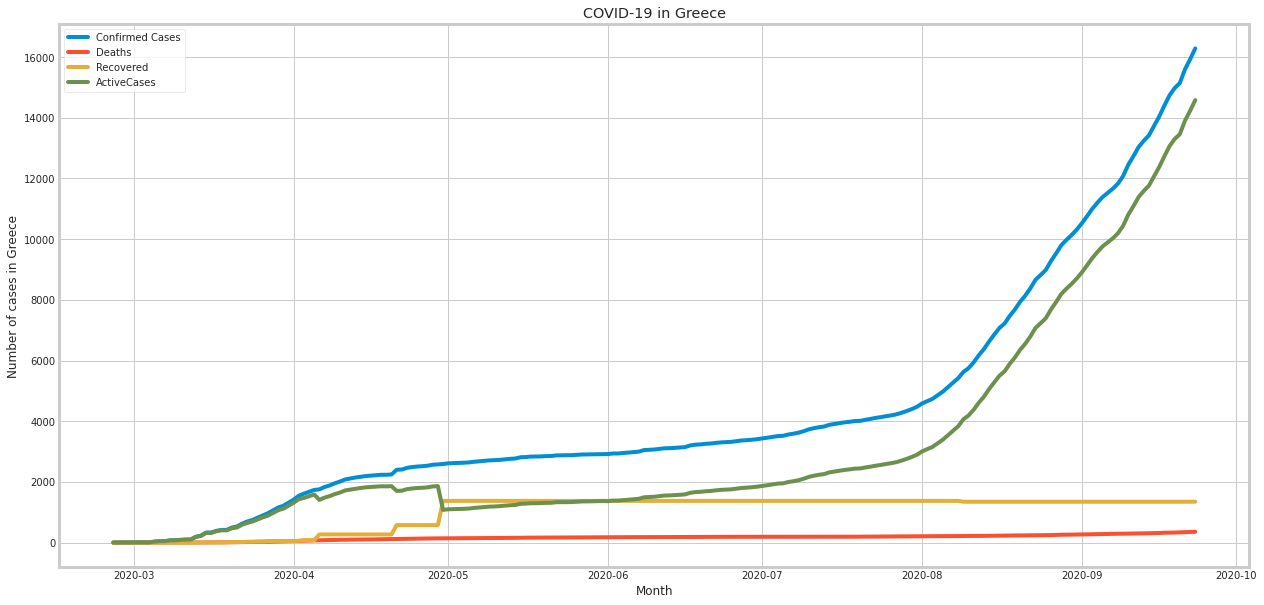

In [ ]:
#plot confirmed,deaths etc
plt.figure(figsize=[19,10])
sns.lineplot(x = Greece_cases.index, y =Greece_cases.Confirmed, legend="full")
sns.lineplot(x = Greece_cases.index, y =Greece_cases.Deaths, legend="full")
sns.lineplot(x = Greece_cases.index, y =Greece_cases.Recovered, legend="full")
sns.lineplot(x = Greece_cases.index, y =Greece_cases.ActiveCases, legend="full")


leg=["Confirmed Cases","Deaths","Recovered","ActiveCases"]
plt.title('COVID-19 in Greece')
plt.legend(leg, prop={'size': 10})
plt.ylabel('Number of cases in Greece')
plt.xlabel('Month')

Text(0.5, 0, 'Month')

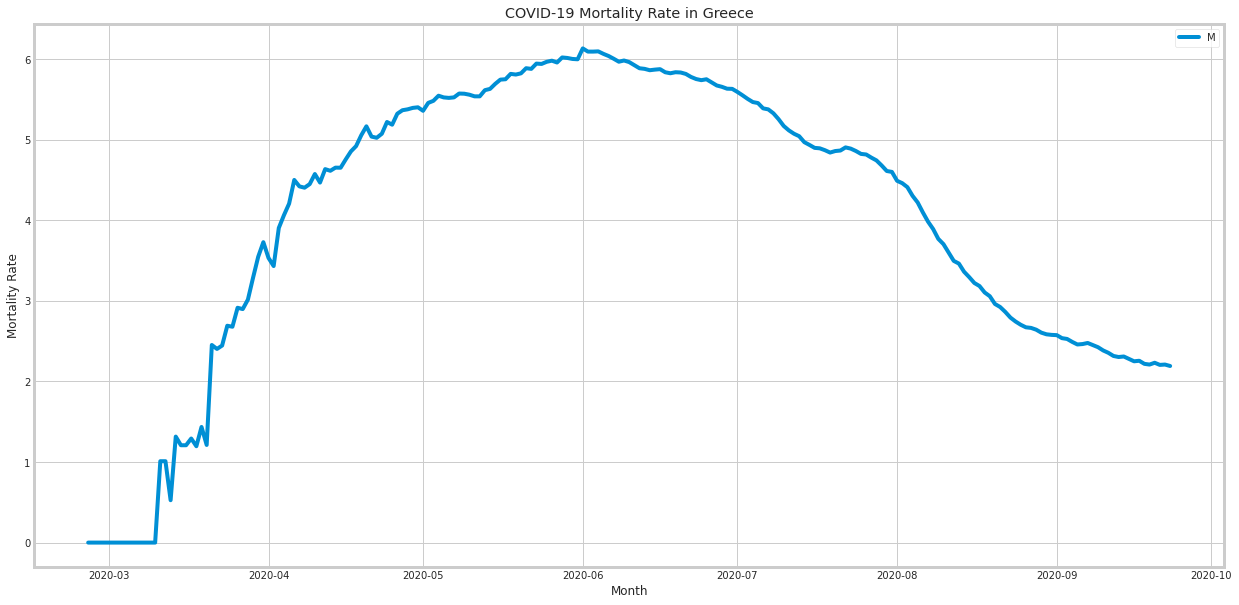

In [ ]:
#plot Mortality Rate in Greece
plt.figure(figsize=[19,10])
sns.lineplot(x = Greece_cases.index, y =Greece_cases.MortalityRate)
leg="Mortality Rate"
plt.title('COVID-19 Mortality Rate in Greece')
plt.legend(leg, prop={'size': 10})
plt.ylabel('Mortality Rate')
plt.xlabel('Month')

## Adding new dataset from https://www.kaggle.com/koryto/countryinfo?select=covid19countryinfo.csv

More info on lockdowns, dates that schools closed, GPD,healtchare info etc

In [ ]:
path1="https://raw.githubusercontent.com/niplessa/Datasets/main/covid19countryinfo.csv"
country = pd.read_csv(path1)

In [ ]:
#rename country to column to be consintent with the other datasets
country = country.rename(columns = {'country':'Country/Region'})

# Change population column to integer data types 
country['pop'] = country[country['pop'].notna()]['pop'].replace(',', '', regex=True).astype('int64')
pop_data = country.groupby('Country/Region').sum()['pop'].reset_index()


In [ ]:
# Get the necessary 
country_attr = country[['Country/Region','pop','density','medianage','urbanpop','sexratio','sex54','sex64','avgtemp','avghumidity','gdp2019']]

In [ ]:
# Change the gdp2019 into numeric
country_attr['gdp2019'] = country_attr['gdp2019'].replace(',', '', regex=True).astype('float')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
country_attr.head(10)

,Country/Region,pop,density,medianage,urbanpop,sexratio,sex54,sex64,avgtemp,avghumidity,gdp2019
0,Afghanistan,38928346.0,60.0,18.0,25.0,1.03,1.03,0.97,6.216667,56.933333,18734.0
1,Albania,2877797.0,105.0,36.0,63.0,0.98,0.93,0.95,13.950000,69.900000,15418.0
2,Algeria,43851044.0,18.0,29.0,73.0,1.03,1.03,1.01,19.566667,61.716667,172781.0
3,Andorra,77265.0,164.0,45.0,88.0,1.06,1.05,1.15,7.383333,75.233333,91527.0
4,Antigua and Barbuda,97929.0,223.0,34.0,26.0,0.90,0.84,0.82,NaN,NaN,1688.0
5,Argentina,45195774.0,17.0,32.0,93.0,0.98,1.00,0.94,32.816667,43.616667,445469.0
6,Armenia,2963243.0,104.0,35.0,63.0,0.94,0.93,0.84,7.100000,58.500000,13444.0
7,Netherlands,106766.0,593.0,41.0,44.0,0.90,0.93,0.87,26.533333,80.166667,2903.0
8,Australia,25499884.0,3.0,38.0,86.0,0.99,0.99,0.93,25.783333,64.233333,1376255.0
9,Austria,9006398.0,109.0,43.0,57.0,0.96,1.00,0.98,9.466667,65.350000,447718.0


In [ ]:
country_attr.isnull().sum()

Country/Region     0
pop               62
density           62
medianage         62
urbanpop          62
sexratio          63
sex54             62
sex64             62
avgtemp           97
avghumidity       97
gdp2019           60
dtype: int64

In [ ]:
country_attr = country_attr.groupby('Country/Region').mean().reset_index().dropna()

In [ ]:
# Joining with countrystat dataframe
Europe_merge = pd.merge(df_Europe, country_attr, how='inner', on=['Country/Region'])

In [ ]:
Europe_merge.head()

,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate,pop,density,medianage,urbanpop,sexratio,sex54,sex64,avgtemp,avghumidity,gdp2019
0,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020,1.459345e+08,9.0,40.000000,74.000000,0.860000,0.960000,0.750000,2.016667,85.466667,1637892.0
1,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020,4.675478e+07,94.0,45.000000,80.000000,0.980000,1.040000,0.950000,16.133333,65.666667,1397870.0
2,France,508456,Europe,31447,96498,380511,6.184803,23-9-2020,1.125262e+07,300.0,35.666667,83.833333,1.018333,1.038333,1.003333,24.944444,76.105556,346490.0
3,United Kingdom,412245,Europe,41951,2247,368047,10.176230,23-9-2020,6.788601e+07,281.0,40.000000,83.000000,0.990000,1.040000,0.980000,6.433333,74.583333,2743586.0
4,Italy,302537,Europe,35758,220665,46114,11.819381,23-9-2020,6.046183e+07,206.0,47.000000,69.000000,0.930000,0.980000,0.940000,15.783333,64.783333,1988636.0


In [ ]:
#create new variables confirmedper1000, deathsper1000
Europe_merge['Confirmedper1000']=Europe_merge['Confirmed']*1000/Europe_merge['pop']
Europe_merge['Deathsper1000']=Europe_merge['Deaths']*1000/Europe_merge['pop']
Europe_merge['GDPpercapita']=Europe_merge['gdp2019']*10**6/Europe_merge['pop']

In [ ]:
Europe_merge.head()


,Country/Region,Confirmed,Continent,Deaths,Recovered,ActiveCases,MortalityRate,LastUpdate,pop,density,medianage,urbanpop,sexratio,sex54,sex64,avgtemp,avghumidity,gdp2019,Confirmedper1000,Deathsper1000,GDPpercapita
0,Russia,1117487,Europe,19720,920602,177165,1.764674,23-9-2020,1.459345e+08,9.0,40.000000,74.000000,0.860000,0.960000,0.750000,2.016667,85.466667,1637892.0,7.657458,0.135129,11223.476467
1,Spain,693556,Europe,31034,150376,512146,4.474621,23-9-2020,4.675478e+07,94.0,45.000000,80.000000,0.980000,1.040000,0.950000,16.133333,65.666667,1397870.0,14.833906,0.663761,29897.906905
2,France,508456,Europe,31447,96498,380511,6.184803,23-9-2020,1.125262e+07,300.0,35.666667,83.833333,1.018333,1.038333,1.003333,24.944444,76.105556,346490.0,45.185573,2.794639,30791.945027
3,United Kingdom,412245,Europe,41951,2247,368047,10.176230,23-9-2020,6.788601e+07,281.0,40.000000,83.000000,0.990000,1.040000,0.980000,6.433333,74.583333,2743586.0,6.072606,0.617962,40414.600292
4,Italy,302537,Europe,35758,220665,46114,11.819381,23-9-2020,6.046183e+07,206.0,47.000000,69.000000,0.930000,0.980000,0.940000,15.783333,64.783333,1988636.0,5.003769,0.591414,32890.769789


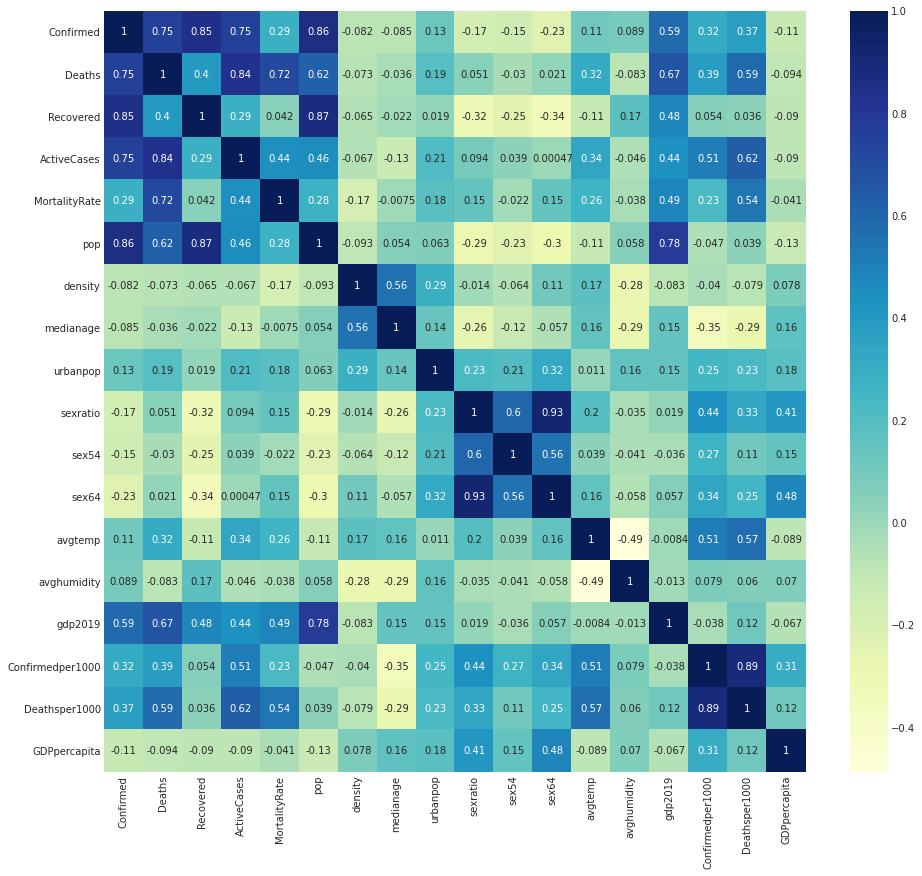

In [ ]:
plt.figure(figsize=[14,14])
sns.heatmap(Europe_merge.corr(), annot=True,cmap="YlGnBu")

## Correlations
[How to read a Correlation Matrix](https://www.statology.org/what-is-a-strong-correlation/)



- Strong correlations between GDP (ακαθάριστο εθνικό προιόν) and Confirmed/Deaths

- GDP also correlates with population.

- So richest countries -> more cases/deaths? More tests?

- Also Deaths -> avgtemp?



In [ ]:
#interactive scatter map (Confirmed vs GDP)
px.scatter(Europe_merge, x='gdp2019', y='Confirmed', color='Country/Region', text='Country/Region').update_layout(title='Confirmed Cases vs GDP 2019 in Europe', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=600)\
.update_traces(textposition='top center', textfont_size=10)


Text(0.5, 1.0, 'Country Population vs Confirmed Cases (Europe)')

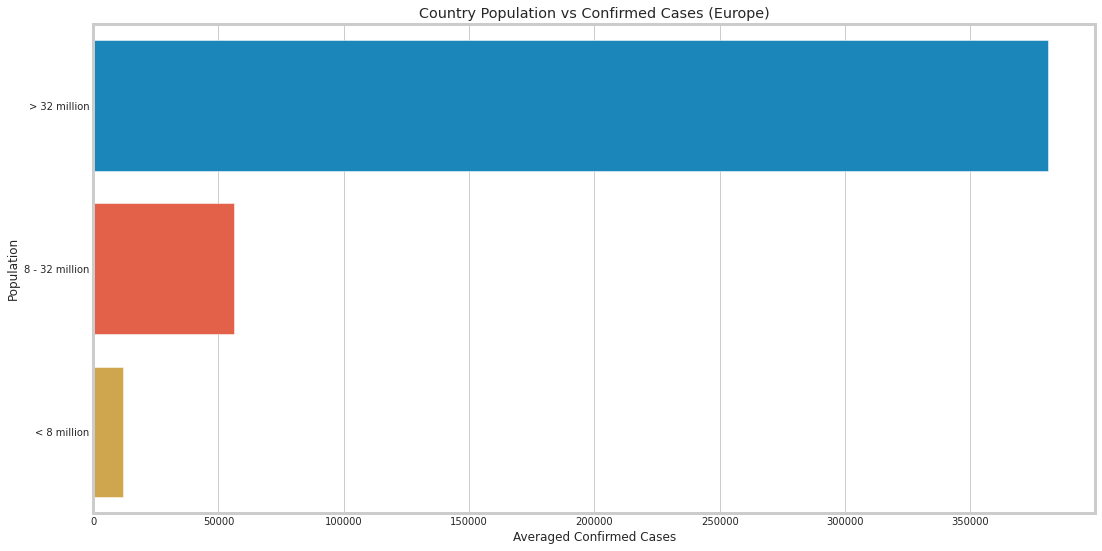

In [ ]:
Europe_merge['pop_label'] = Europe_merge['pop'].apply(lambda x: '> 32 million' if x > Europe_merge['pop'].describe()[6] else ('8 - 32 million' if (x > Europe_merge['pop'].median()) & (x < Europe_merge['pop'].describe()[6]) else '< 8 million' ))
con = Europe_merge.groupby('pop_label').mean()['Confirmed'].reset_index().sort_values('Confirmed', ascending=False)

plt.figure(figsize=[16,9])
sns.barplot(x='Confirmed', y='pop_label', data =con, order = con['pop_label'])
plt.ylabel('Population')
plt.xlabel('Averaged Confirmed Cases')
plt.title('Country Population vs Confirmed Cases (Europe)')


In [ ]:
fig = px.scatter(Europe_merge, x='medianage', y='Deaths', color='Country/Region', text='Country/Region').update_layout(title='Median Age vs Number of COVID-19 Deaths by Country', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=16)
fig.layout.template = 'seaborn'
fig.show()


In [ ]:
fig = px.scatter(Europe_merge, x='medianage', y='MortalityRate', color='Country/Region', text='Country/Region').update_layout(title='Median Age vs Mortality Rate by Country', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=16)
fig.layout.template = 'seaborn'
fig.show()


Text(0.5, 1.0, 'Median Age of Countries vs Average Number of Death')

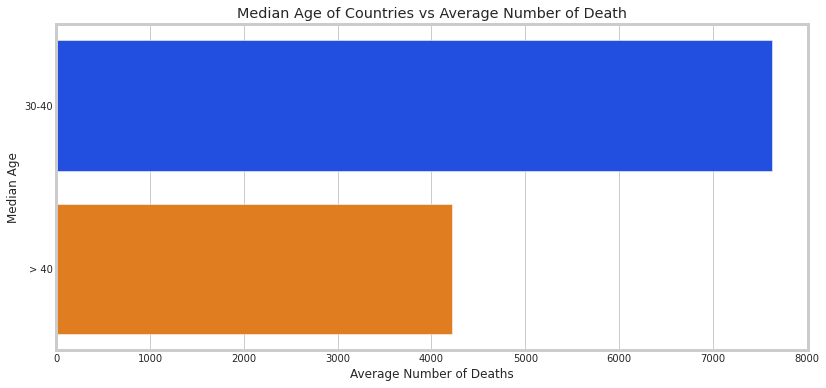

In [ ]:
Europe_merge['medianage_label'] = Europe_merge['medianage'].apply(lambda x: '> 40' if x > 40 else ('30-40' if (x <=40) & (x >=30) else '< 30'))
ma = Europe_merge.groupby('medianage_label').mean()['Deaths'].reset_index().sort_values('Deaths', ascending=False)
plt.figure(figsize=[12,6])
sns.barplot(x='Deaths', y='medianage_label', data =ma, palette='bright')
plt.ylabel('Median Age')
plt.xlabel('Average Number of Deaths')
plt.title('Median Age of Countries vs Average Number of Death')


In [ ]:
fig = px.scatter(Europe_merge, x='avgtemp', y='Deaths', color='Country/Region', text='Country/Region').update_layout(title='Temperature to Deaths Correlation (?)', xaxis_type='log', yaxis_type='log',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=16)
fig.layout.template = 'seaborn'
fig.show()


## Cases and Deaths vs Healtchare


In [ ]:
# Getting the necessary column and drop row with missing values
country_health = country[['Country/Region','hospibed','smokers','lung','malelung','femalelung','healthexp','healthperpop']]
country_health['healthexp'] = country_health['healthexp'].replace(',', '', regex=True).astype('float')
country_health = country_health.groupby('Country/Region').mean().dropna()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Europe_health_merge = pd.merge(df_Europe, country_health, how='inner', on=['Country/Region'])


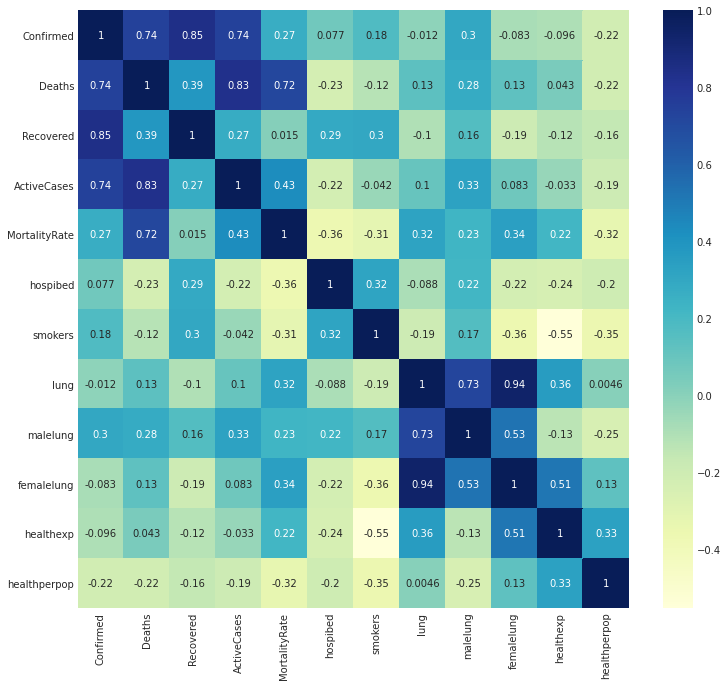

In [ ]:
plt.figure(figsize=[11,11])
sns.heatmap(Europe_health_merge.corr(), annot=True,cmap="YlGnBu")


## Correlations:
[How to read a Correlation Matrix](https://www.statology.org/what-is-a-strong-correlation/)

- Strong Negative Correlations between healthexp,healthperpop and hospibed and Mortality Rate. Seems fair.

- Negative correlation between smokers and 


In [ ]:
px.scatter(Europe_health_merge, x='hospibed', y='MortalityRate', color='Country/Region', text='Country/Region').update_layout(xaxis_type='log', yaxis_type='log',title='Mortality Rate vs Hospital Beds',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=11)


In [ ]:
px.scatter(Europe_health_merge, x='healthperpop', y='MortalityRate', color='Country/Region', text='Country/Region').update_layout(xaxis_type='log', yaxis_type='log',title='Mortality Rates vs Health Expensers per population',showlegend=False,autosize=False,
    width=1200,
    height=700)\
.update_traces(textposition='top center', textfont_size=11)


## OurWorldInData (owid) has issued a dataset with more than 35 variables including testing

link here: https://github.com/owid/covid-19-data/tree/master/public/data

variable explanation: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv




In [ ]:
path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
owid = pd.read_csv(path)

In [ ]:
# Change date column to datetime data types
owid['date'] = pd.to_datetime(owid['date'])
owid['date'] = owid['date'].apply(lambda x: x.date())

Create new dataset for Europe

In [ ]:
dfEur = owid[owid['continent']=="Europe"]

In [ ]:
#Εύρεση μεγαλύτερης ημερομηνίας του Dataset
d = owid['date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

print("\nLast update: {}-{}-{}\n".format(year,month,day))
last_date = str(day)+"-"+str(month)+"-"+str(year)
#print(last_date)

#data_latest : last date in datetime
data_latest = dfEur[dfEur['date'] >= pd.Timestamp(date(year,month,day))]
Europe_cases=data_latest.sort_values(by=['total_cases'],ascending=False).reset_index(drop=True)
Europe_cases=Europe_cases.fillna(0)
Europe_cases.style.background_gradient(cmap='Blues')


Last update: 2020-10-14



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,RUS,Europe,Russia,2020-10-14,1326178.000000,13868.000000,12667.714000,22966.000000,244.000000,186.143000,9087.490000,95.029000,86.804000,157.372000,1.672000,1.276000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,145934460.000000,8.823000,39.600000,14.178000,9.393000,24765.954000,0.100000,431.297000,6.180000,23.400000,58.300000,0.000000,8.050000,72.580000,0.816000
1,FRA,Europe,France,2020-10-14,756472.000000,12993.000000,17387.000000,32933.000000,108.000000,81.143000,11589.265000,199.055000,266.371000,504.539000,1.655000,1.243000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,65273512.000000,122.578000,42.000000,19.718000,13.079000,38605.671000,0.000000,86.060000,4.770000,30.100000,35.600000,0.000000,5.980000,82.660000,0.901000
2,GBR,Europe,United Kingdom,2020-10-14,634920.000000,17232.000000,14972.429000,43018.000000,143.000000,81.857000,9352.738000,253.837000,220.553000,633.680000,2.106000,1.206000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,67886004.000000,272.898000,40.800000,18.517000,12.527000,39753.244000,0.200000,122.137000,4.280000,20.000000,24.700000,0.000000,2.540000,81.320000,0.922000
3,ITA,Europe,Italy,2020-10-14,365467.000000,5898.000000,5029.143000,36246.000000,41.000000,30.857000,6044.591000,97.549000,83.179000,599.486000,0.678000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,60461828.000000,205.859000,47.900000,23.021000,16.240000,35220.084000,2.000000,113.151000,4.780000,19.800000,27.800000,0.000000,3.180000,83.510000,0.880000
4,DEU,Europe,Germany,2020-10-14,334585.000000,5132.000000,4071.286000,9677.000000,43.000000,16.429000,3993.426000,61.253000,48.593000,115.499000,0.513000,0.196000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,83783945.000000,237.016000,46.600000,21.453000,15.957000,45229.245000,0.000000,156.139000,8.310000,28.200000,33.100000,0.000000,8.000000,81.330000,0.936000
5,UKR,Europe,Ukraine,2020-10-14,270587.000000,5133.000000,5143.286000,5133.000000,118.000000,87.571000,6187.143000,117.369000,117.604000,117.369000,2.698000,2.002000,34166.000000,2665154.000000,60.940000,0.781000,29964.000000,0.685000,5.826000,0.172000,tests performed,0.000000,43733759.000000,77.390000,41.400000,16.462000,11.133000,7894.393000,0.100000,539.849000,7.110000,13.500000,47.400000,0.000000,8.800000,72.060000,0.751000
6,NLD,Europe,Netherlands,2020-10-14,188662.000000,7368.000000,6260.571000,6622.000000,35.000000,21.286000,11010.411000,430.000000,365.370000,386.463000,2.043000,1.242000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,17134873.000000,508.544000,43.200000,18.779000,11.881000,48472.545000,0.000000,109.361000,5.290000,24.400000,27.300000,0.000000,3.320000,82.280000,0.931000
7,ROU,Europe,Romania,2020-10-14,160461.000000,3109.000000,2978.429000,5535.000000,68.000000,59.143000,8340.974000,161.610000,154.823000,287.717000,3.535000,3.074000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,19237682.000000,85.129000,43.000000,17.850000,11.690000,23313.199000,5.700000,370.946000,9.740000,22.900000,37.100000,0.000000,6.892000,76.050000,0.811000
8,POL,Europ

## Countries that tested more in Europe